In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data collection

In [2]:
wine_data=pd.read_csv('/content/winequality-red.csv')

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.shape

(1596, 12)

In [5]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


data analysis and data visualization

In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [8]:
wine_data['quality'].value_counts()

5    680
6    637
7    199
4     52
8     18
3     10
Name: quality, dtype: int64

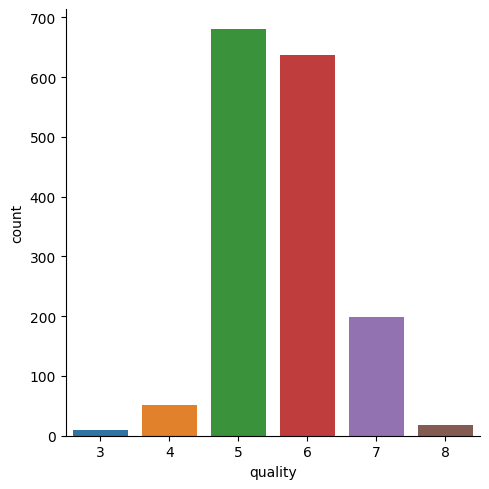

In [9]:
#number of values for each quality
sns.catplot(x='quality',data=wine_data,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

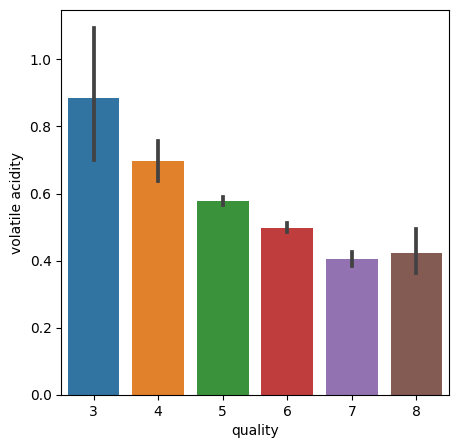

In [10]:
#compare volatile acididty vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

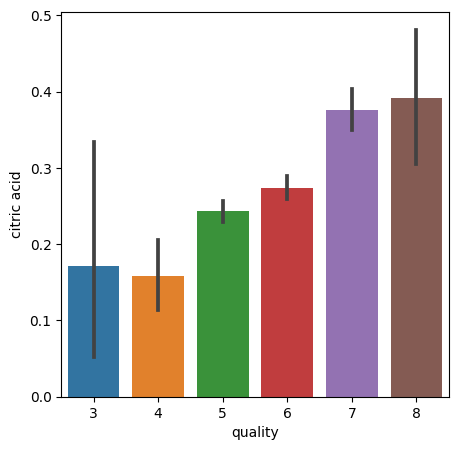

In [11]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_data)

corelation

In [12]:
correlation=wine_data.corr()

In [13]:
print(correlation)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255155     0.673008   
volatile acidity          -0.255155          1.000000    -0.554503   
citric acid                0.673008         -0.554503     1.000000   
residual sugar             0.106105          0.003957     0.139208   
chlorides                  0.093876          0.064332     0.185893   
free sulfur dioxide       -0.157011         -0.010077    -0.065745   
total sulfur dioxide      -0.116725          0.077515     0.033206   
density                    0.670895          0.022390     0.363162   
pH                        -0.685062          0.235119    -0.537645   
sulphates                  0.185061         -0.269707     0.306241   
alcohol                   -0.073644         -0.201160     0.108285   
quality                    0.127766         -0.391735     0.233733   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<Axes: >

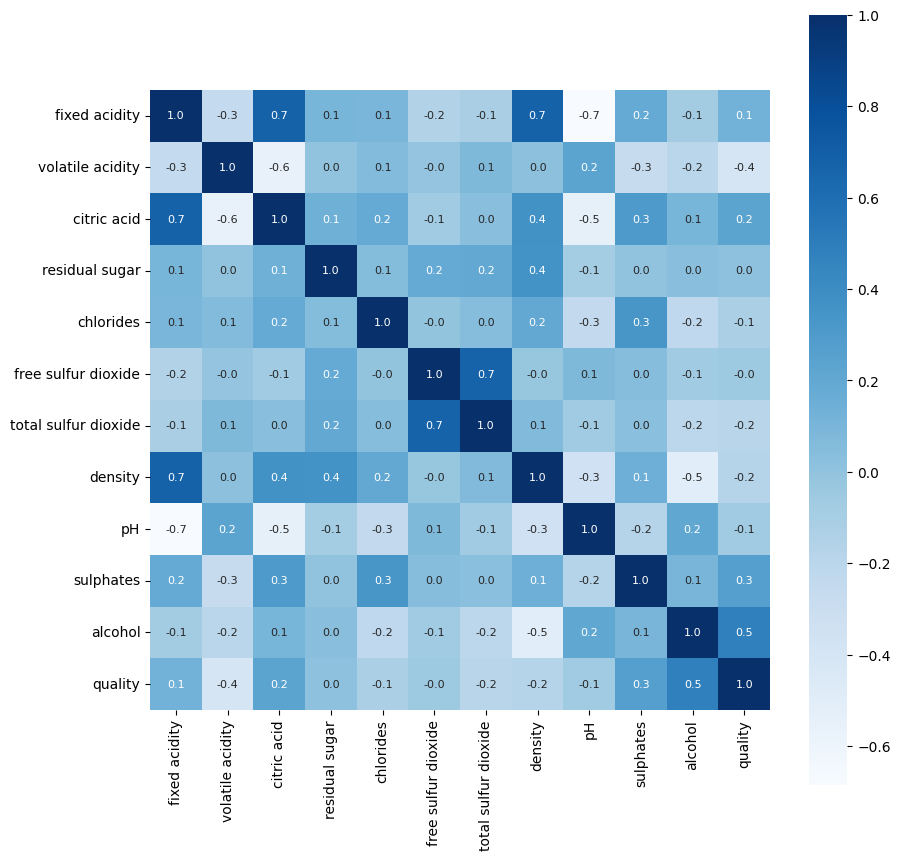

In [14]:
#constructing heat map
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

data preprocessing

In [17]:
x=wine_data.drop(['quality'],axis=1)

In [16]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1591            6.2             0.600         0.08             2.0      0.090   
1592            5.9             0.550         0.10             2.2      0.062   
1593            6.3             0.510         0.13             2.3      0.076   
1594            5.9             0.645         0.12             2.0      0.075   
1595            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

label binarization

In [18]:
y=wine_data['quality'].apply(lambda y_value : 1 if y_value>=7 else 0)

In [19]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1591    0
1592    0
1593    0
1594    0
1595    0
Name: quality, Length: 1596, dtype: int64


In [20]:
y.value_counts()

0    1379
1     217
Name: quality, dtype: int64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
print(x.shape,x_train.shape,x_test.shape)

(1596, 11) (1276, 11) (320, 11)


model training

random forest classifier

In [24]:
model=RandomForestClassifier()

In [25]:
model.fit(x_train,y_train)

RandomForestClassifier()

evaluation

accuracy on testing data

In [26]:
x_test_prediction=model.predict(x_test)
test_prediction_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy is : ',test_prediction_accuracy)

accuracy is :  0.9


In [27]:
x_train_prediction=model.predict(x_train)
train_predict_accuracy=accuracy_score(x_train_prediction,y_train)
print(train_predict_accuracy)

1.0


In [29]:
#making a predictive system
input_data=(7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5)
input_data_as_array=np.asarray(input_data)
reshaped_data=input_data_as_array.reshape(1,-1)
predicted_data=model.predict(reshaped_data)
print(predicted_data)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
